<a href="https://colab.research.google.com/github/bbhargavpanchal/Computer-Vision/blob/main/Computer_Vision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Option 2: Computer Vision**
Complexity: Intermediate 

Task2: Count the number of items in the given freezer images.

Tip: Detect & Locate all the compartments of the Refrigerator using computer-vison techniques, and then count.

User story:As a user I should provide a path to the image, and the program should count and display the information 
about the number of items in the image.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


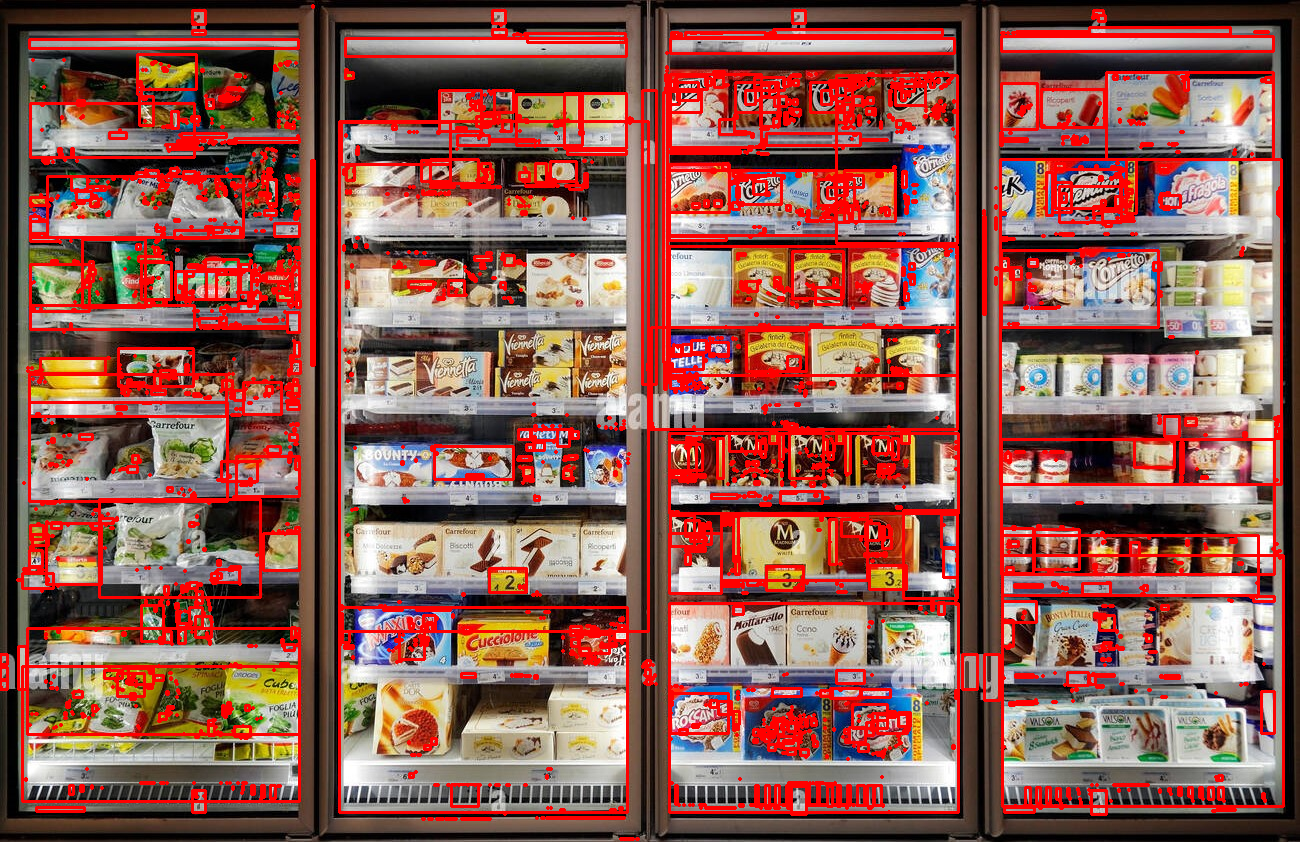

Number of items in the image: 2887


In [ ]:
!pip install opencv-python
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def count_items(img_path):
  # Load the image from the given path
  img = cv2.imread(img_path)

  # Convert the image to grayscale for better processing
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply thresholding to the image to convert it to binary
  _, threshold = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw rectangles around each contour to visually show the items
  for cnt in contours:
      x,y,w,h = cv2.boundingRect(cnt)
      cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)

  # Display the original image with the rectangles drawn
  cv2_imshow(img)

  # Return the number of items
  return len(contours)

# Example usage
img_path = "/content/freezer_image.jpg"
item_count = count_items(img_path)
print("Number of items in the image:", item_count)


Improved version

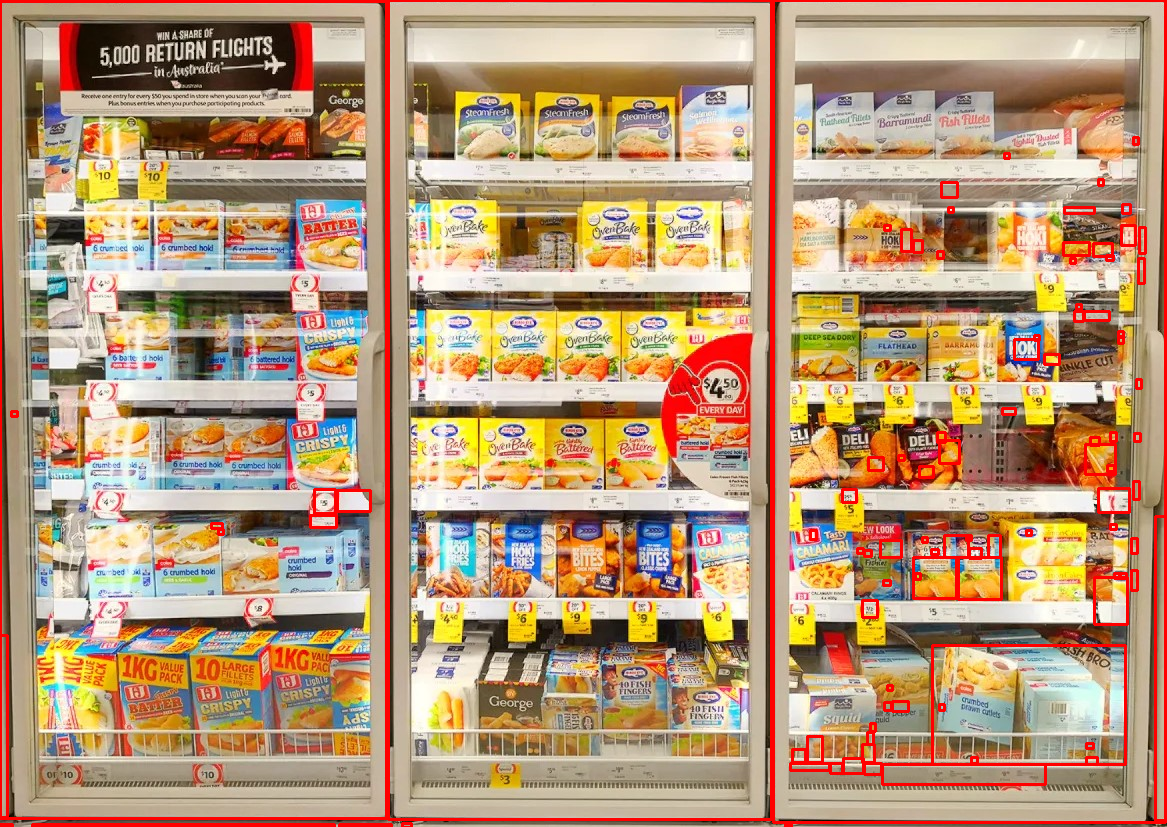

Number of items in the image: 97


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def count_items(img_path):
  # Load the image from the given path
  img = cv2.imread(img_path)

  # Convert the image to grayscale for better processing
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply Otsu thresholding to the grayscale image
  _, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Perform morphological operations to remove noise and fill small holes in the image
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)

  # Find contours in the binary image
  contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Draw rectangles around each contour to visually show the items
  for cnt in contours:
      x,y,w,h = cv2.boundingRect(cnt)
      cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)

  # Display the original image with the rectangles drawn
  cv2_imshow(img)

  # Return the number of items
  return len(contours)

# Example usage
img_path = "/content/freezer_image1.jpg"
item_count = count_items(img_path)
print("Number of items in the image:", item_count)
